## Logistic Regression

**Implementation of Logistic regression using Pytorch**

The credits for the image go to Stats 453 course by Sebastian Raschka

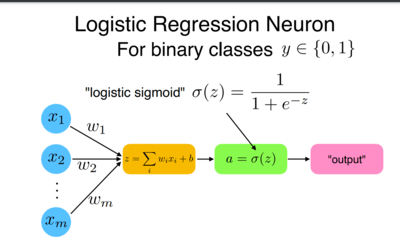

In [1]:
import pandas as pd
import torch
from torch.autograd import grad
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
toy_data=pd.read_csv('/content/logistic_toydata.txt',delimiter='\t')

In [3]:
toy_data

,0.77,-1.14,0
0,-0.33,1.44,0
1,0.91,-3.07,0
2,-0.37,-1.91,0
3,-1.84,-1.13,0
4,-1.50,0.34,0
...,...,...,...
94,0.71,2.27,1
95,1.96,0.83,1
96,2.52,1.83,1
97,2.77,2.82,1


In [4]:
X=toy_data.iloc[:,:2].values
y=toy_data.iloc[:,2].values

In [5]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (99, 2)
Shape of y: (99,)


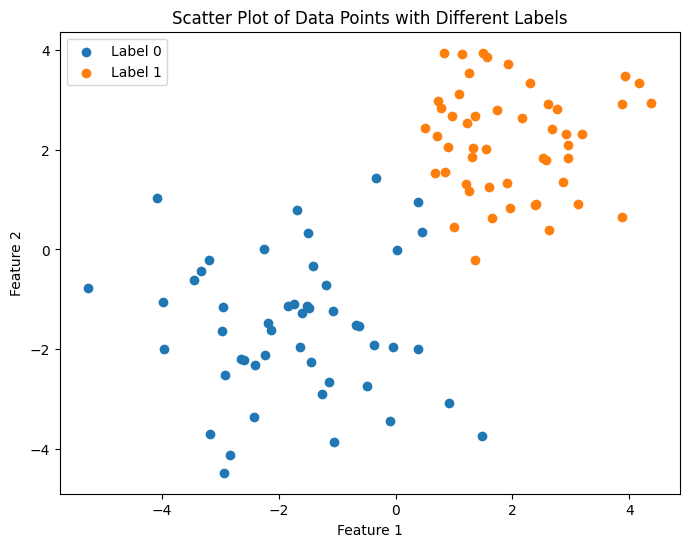

In [6]:
labels=np.unique(y)

plt.figure(figsize=(8, 6))

for label in labels:
  plt.scatter(X[y==label,0],X[y==label,1],label=f"Label {int(label)}")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Points with Different Labels')
plt.legend()

plt.show()

In [7]:
torch.manual_seed(120)

shuffle_idx=torch.randperm(X.shape[0])

X=X[shuffle_idx]
y=y[shuffle_idx]

X_tensor=torch.tensor(X,dtype=torch.float)
y_tensor=torch.tensor(y,dtype=torch.float)

percent70=int(0.7*X.shape[0])

X_train,X_test=X[:percent70],X[percent70:]
y_train,y_test=y[:percent70],y[percent70:]

X_train_tensor,X_test_tensor=X_tensor[:percent70],X_tensor[percent70:]
y_train_tensor,y_test_tensor=y_tensor[:percent70],y_tensor[percent70:]

### 1. Logistic Regression Semi Automated

In [8]:
class LogisticRegression01():
  def __init__(self,num_features):
    self.num_features=num_features
    self.weights=torch.zeros(num_features,1,requires_grad=True)
    self.bias=torch.zeros(1,requires_grad=True)

  def forward(self,X):
    z=torch.matmul(X,self.weights)+self.bias
    return torch.sigmoid(z).reshape(-1)

  def train(self,X,y,num_epochs,lr=0.01,minibatch_size=10):

    loss_arr=[]

    torch.manual_seed(123)
    for epoch in range(num_epochs):
      shuffle_idx=torch.randperm(X.shape[0])
      X=X[shuffle_idx]
      y=y[shuffle_idx]

      minibatch_indices=torch.split(shuffle_idx,minibatch_size)

      for minibatch_idx in minibatch_indices:
        y_preds=self.forward(X[minibatch_idx])
        loss=F.binary_cross_entropy(y_preds,y[minibatch_idx])

        grad_w=grad(loss,self.weights,retain_graph=True)[0]
        grad_b=grad(loss,self.bias)[0]

        self.weights=self.weights-lr*grad_w
        self.bias=self.bias-lr*grad_b

      with torch.no_grad():
        epoch_loss=F.binary_cross_entropy(self.forward(X),y)
        loss_arr.append(epoch_loss)

        print(f"epoch: {epoch} loss: {epoch_loss}")
    return loss_arr

In [9]:
logistic_regr01=LogisticRegression01(num_features=X_train.shape[1])
loss=logistic_regr01.train(X_train_tensor,y_train_tensor,50)


epoch: 0 loss: 0.5850575566291809
epoch: 1 loss: 0.504164457321167
epoch: 2 loss: 0.44295385479927063
epoch: 3 loss: 0.395677387714386
epoch: 4 loss: 0.3583828806877136
epoch: 5 loss: 0.3281315863132477
epoch: 6 loss: 0.3032587468624115
epoch: 7 loss: 0.28248369693756104
epoch: 8 loss: 0.2648995816707611
epoch: 9 loss: 0.24984110891819
epoch: 10 loss: 0.23684385418891907
epoch: 11 loss: 0.22542636096477509
epoch: 12 loss: 0.21533547341823578
epoch: 13 loss: 0.20637576282024384
epoch: 14 loss: 0.19836147129535675
epoch: 15 loss: 0.19113874435424805
epoch: 16 loss: 0.1846034675836563
epoch: 17 loss: 0.1786930412054062
epoch: 18 loss: 0.17324842512607574
epoch: 19 loss: 0.16825900971889496
epoch: 20 loss: 0.16367508471012115
epoch: 21 loss: 0.15942668914794922
epoch: 22 loss: 0.15548677742481232
epoch: 23 loss: 0.15183687210083008
epoch: 24 loss: 0.1484338790178299
epoch: 25 loss: 0.145246684551239
epoch: 26 loss: 0.14224983751773834
epoch: 27 loss: 0.13943809270858765
epoch: 28 loss: 0.1

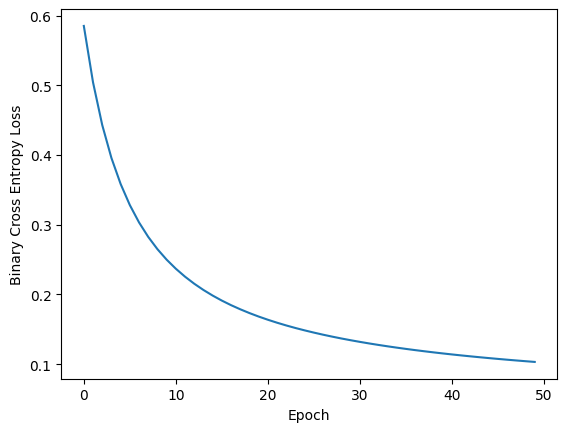

In [10]:
plt.plot(range(len(loss)), loss)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.show()

In [11]:
y_preds=logistic_regr01.forward(X_test_tensor)

y_preds=torch.where(y_preds>0.5,1,0)


accuracy=torch.sum(y_preds==y_test_tensor)/len(y_test_tensor)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333373069763


In [12]:
weights=logistic_regr01.weights
bias=logistic_regr01.bias

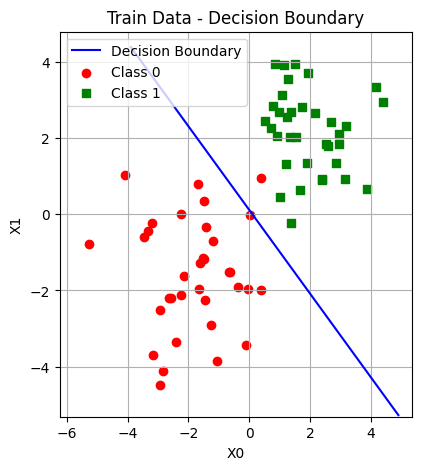

In [13]:
# w1*X1 + w0*X0 +b = 0 => Decision Boundary


X_train_min, X_train_max = X_train[:, 0].min(), X_train[:, 0].max()
X_train_y_min, X_train_y_max = X_train[:, 1].min(), X_train[:, 1].max()


X1_first_train = X_train_min

X0_first_train = -(bias + (X1_first_train * weights[1])) / weights[0]
X0_first_train = X0_first_train.detach().numpy()


X1_second_train = X_train_max
X0_second_train = -(bias + (X1_second_train * weights[1])) / weights[0]
X0_second_train = X0_second_train.detach().numpy()


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot([X0_first_train, X0_second_train], [X1_first_train, X1_second_train], color='blue', label='Decision Boundary')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class 1', marker='s', color='green')

X_train_x_margin = (X_train_max - X_train_min) * 0.1
X_train_y_margin = (X_train_y_max - X_train_y_min) * 0.1

plt.xlim(X_train_min - X_train_x_margin, X_train_max + X_train_x_margin)
plt.ylim(X_train_y_min - X_train_y_margin, X_train_y_max + X_train_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Train Data - Decision Boundary')
plt.legend()
plt.grid(True)

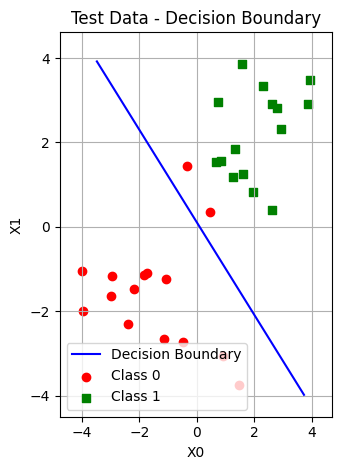

In [14]:
X_test_min, X_test_max = X_test[:, 0].min(), X_test[:, 0].max()
X_test_y_min, X_test_y_max = X_test[:, 1].min(), X_test[:, 1].max()

X1_first_test = X_test_min
X0_first_test = -(bias + (X1_first_test * weights[1])) / weights[0]
X0_first_test = X0_first_test.detach().numpy()


X1_second_test = X_test_max
X0_second_test = -(bias + (X1_second_test * weights[1])) / weights[0]
X0_second_test = X0_second_test.detach().numpy()

# Test plot
plt.subplot(1, 2, 2)
plt.plot([X0_first_test, X0_second_test], [X1_first_test, X1_second_test], color='blue', label='Decision Boundary')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class 1', marker='s', color='green')

X_test_x_margin = (X_test_max - X_test_min) * 0.1
X_test_y_margin = (X_test_y_max - X_test_y_min) * 0.1

plt.xlim(X_test_min - X_test_x_margin, X_test_max + X_test_x_margin)
plt.ylim(X_test_y_min - X_test_y_margin, X_test_y_max + X_test_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Test Data - Decision Boundary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2. Logistic Regression Automated

In [15]:
class LogisticRegression02(torch.nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.linear=torch.nn.Linear(num_features,1)
    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  def forward(self,X):
    z=self.linear(X)
    return torch.sigmoid(z).reshape(-1)

  def train(self,X,y,num_epochs,lr=0.01,minibatch_size=10):
    loss_arr=[]

    torch.manual_seed(123)

    optimizer = torch.optim.SGD(self.parameters(), lr=lr)

    for epoch in range(num_epochs):
      shuffle_idx=torch.randperm(X.shape[0])
      X=X[shuffle_idx]
      y=y[shuffle_idx]

      minibatch_indices=torch.split(shuffle_idx,minibatch_size)

      for minibatch_idx in minibatch_indices:
        y_preds=self.forward(X[minibatch_idx])
        loss=F.binary_cross_entropy(y_preds,y[minibatch_idx])
        #### Reset gradients from previous iteration because otherwise pytorch will accumulate gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      with torch.no_grad():
        epoch_loss=F.binary_cross_entropy(self.forward(X),y)
        loss_arr.append(epoch_loss)

        print(f"epoch: {epoch} loss: {epoch_loss}")
    return loss_arr




In [16]:
logistic_regr02=LogisticRegression02(num_features=X_train.shape[1])
loss02=logistic_regr02.train(X_train_tensor,y_train_tensor,50)


epoch: 0 loss: 0.5850575566291809
epoch: 1 loss: 0.5041643977165222
epoch: 2 loss: 0.442953884601593
epoch: 3 loss: 0.395677387714386
epoch: 4 loss: 0.3583828806877136
epoch: 5 loss: 0.3281315863132477
epoch: 6 loss: 0.3032587468624115
epoch: 7 loss: 0.28248369693756104
epoch: 8 loss: 0.2648995816707611
epoch: 9 loss: 0.24984110891819
epoch: 10 loss: 0.23684388399124146
epoch: 11 loss: 0.22542636096477509
epoch: 12 loss: 0.21533547341823578
epoch: 13 loss: 0.20637579262256622
epoch: 14 loss: 0.19836147129535675
epoch: 15 loss: 0.19113874435424805
epoch: 16 loss: 0.1846034675836563
epoch: 17 loss: 0.17869305610656738
epoch: 18 loss: 0.17324844002723694
epoch: 19 loss: 0.16825900971889496
epoch: 20 loss: 0.16367508471012115
epoch: 21 loss: 0.15942668914794922
epoch: 22 loss: 0.15548677742481232
epoch: 23 loss: 0.15183687210083008
epoch: 24 loss: 0.1484338790178299
epoch: 25 loss: 0.145246684551239
epoch: 26 loss: 0.14224983751773834
epoch: 27 loss: 0.13943809270858765
epoch: 28 loss: 0.1

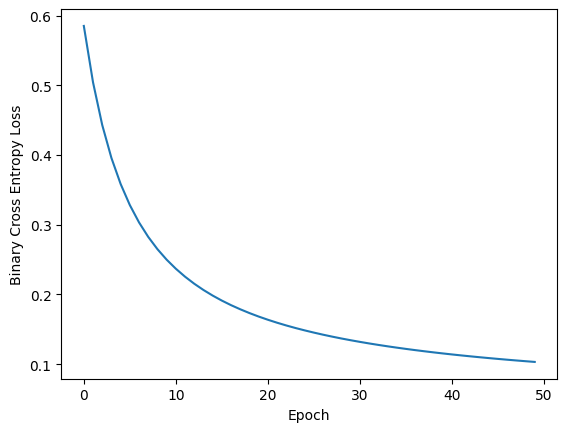

In [17]:
plt.plot(range(len(loss02)), loss02)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.show()

In [18]:
y_preds=logistic_regr02.forward(X_test_tensor)

y_preds=torch.where(y_preds>0.5,1,0)


accuracy=torch.sum(y_preds==y_test_tensor)/len(y_test_tensor)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333373069763


In [20]:
weights=logistic_regr02.linear.weight
bias=logistic_regr02.linear.bias

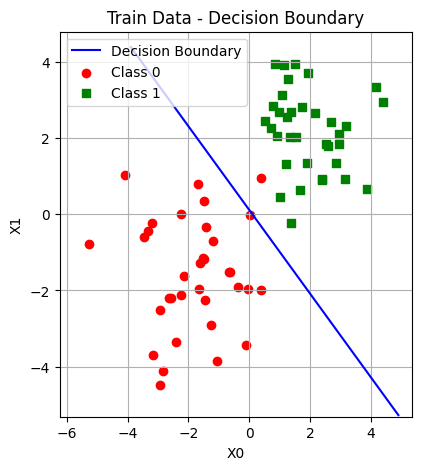

In [26]:
# w1*X1 + w0*X0 +b = 0 => Decision Boundary


X_train_min, X_train_max = X_train[:, 0].min(), X_train[:, 0].max()
X_train_y_min, X_train_y_max = X_train[:, 1].min(), X_train[:, 1].max()


X1_first_train = X_train_min

X0_first_train = -(bias + (X1_first_train * weights[0][1])) / weights[0][0]
X0_first_train = X0_first_train.detach().numpy()


X1_second_train = X_train_max
X0_second_train = -(bias + (X1_second_train * weights[0][1])) / weights[0][0]
X0_second_train = X0_second_train.detach().numpy()


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot([X0_first_train, X0_second_train], [X1_first_train, X1_second_train], color='blue', label='Decision Boundary')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class 1', marker='s', color='green')

X_train_x_margin = (X_train_max - X_train_min) * 0.1
X_train_y_margin = (X_train_y_max - X_train_y_min) * 0.1

plt.xlim(X_train_min - X_train_x_margin, X_train_max + X_train_x_margin)
plt.ylim(X_train_y_min - X_train_y_margin, X_train_y_max + X_train_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Train Data - Decision Boundary')
plt.legend()
plt.grid(True)

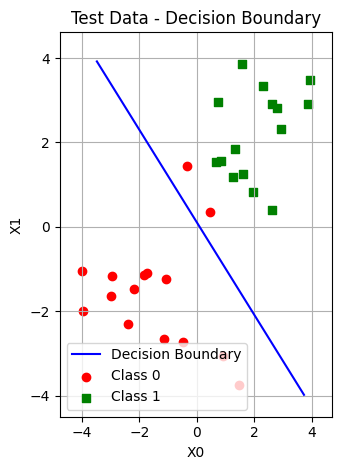

In [27]:
X_test_min, X_test_max = X_test[:, 0].min(), X_test[:, 0].max()
X_test_y_min, X_test_y_max = X_test[:, 1].min(), X_test[:, 1].max()

X1_first_test = X_test_min
X0_first_test = -(bias + (X1_first_test * weights[0][1])) / weights[0][0]
X0_first_test = X0_first_test.detach().numpy()


X1_second_test = X_test_max
X0_second_test = -(bias + (X1_second_test * weights[0][1])) / weights[0][0]
X0_second_test = X0_second_test.detach().numpy()

# Test plot
plt.subplot(1, 2, 2)
plt.plot([X0_first_test, X0_second_test], [X1_first_test, X1_second_test], color='blue', label='Decision Boundary')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class 1', marker='s', color='green')

X_test_x_margin = (X_test_max - X_test_min) * 0.1
X_test_y_margin = (X_test_y_max - X_test_y_min) * 0.1

plt.xlim(X_test_min - X_test_x_margin, X_test_max + X_test_x_margin)
plt.ylim(X_test_y_min - X_test_y_margin, X_test_y_max + X_test_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Test Data - Decision Boundary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()